Task 6.1

Please change in the code above the spacing of the grid (units are meters) using:
10 km,
50 km
the code to be changed is the one below.
for help please use np.arange?
xi = np.arange(df.eastings.min(),df.eastings.max(),25000)
yi = np.arange(df.northings.min(),df.northings.max(),25000)

In [ ]:
import os
os.chdir('C:\\Users/Sudha/Desktop')


In [4]:
import pandas as pd
import numpy as np

points=pd.read_csv("points3d.csv")


In [5]:
from matplotlib import pyplot as plt

points.plot(x='eastings', y='northings', marker='.')
plt.show()

<Figure size 640x480 with 1 Axes>

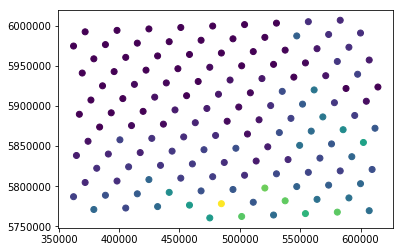

In [6]:
x,y,z = [],[],[]

x.append (points.eastings)
y.append (points.northings)
z.append (points.topo)
fig = plt.figure()
#ax = fig.add_subplot(111)
#plt.plot(y,x,'.')
#ax.plot(y,x,'.')
plt.scatter(x,y,c=z)
plt.show()

5
5


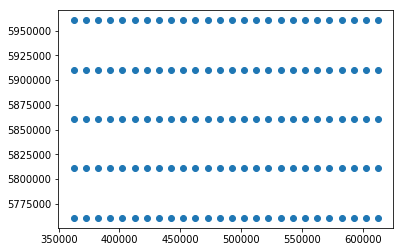

In [13]:
import numpy as np
from scipy.interpolate import griddata
from numpy import genfromtxt

my_data = genfromtxt('points3d.csv', delimiter=',')
x = my_data[1:, 0]
y = my_data[1:, 1]
z = my_data[1:, 2]

# target grid to interpolate to
xi = np.arange(points.eastings.min(),points.eastings.max(),10000)
yi = np.arange(points.northings.min(),points.northings.max(),50000)

xi,yi = np.meshgrid(xi,yi)

print(len(xi))
print(len(yi))

plt.scatter(xi, yi)
plt.show()

# interpolate
# zi = griddata((x,y),z,(xi,yi),method='linear')
zi = griddata((x,y),z,(xi,yi),method='nearest')


T6.2 change histogram bin

1.please produce histograms of the above topography over Europe using different bins.

2.Considering that the resolution of the topography is about 1.8 km, how much is the area of the imaged part of europe and africa between 0 and 1000 meters of altitude in square kilometers?

In [17]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr
import matplotlib.pyplot as plt
import netCDF4

crs
lat
lon
Band1
[[-1.310e+02 -1.240e+02 -1.210e+02 ...  1.380e+02  1.380e+02  1.370e+02]
 [-1.370e+02 -1.260e+02 -1.230e+02 ...  1.330e+02  1.320e+02  1.390e+02]
 [-1.440e+02 -1.320e+02 -1.250e+02 ...  1.240e+02  1.280e+02  1.310e+02]
 ...
 [-1.084e+03 -1.093e+03 -1.106e+03 ... -3.000e+00 -4.000e+00 -7.000e+00]
 [-1.069e+03 -1.075e+03 -1.086e+03 ... -5.000e+00 -4.000e+00 -9.000e+00]
 [-1.060e+03 -1.063e+03 -1.070e+03 ... -4.000e+00 -2.000e+00 -1.000e+00]]


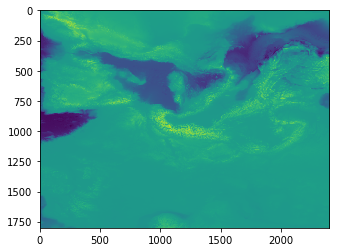

In [24]:
filename = 'C:\\Users/Sudha/Desktop/MEGI001-2101033-IntroEarthData/notebooks/data/data_samples/geospatial-raster/etopo1.nc'   # Local NetCDF file

# etopo= netCDF4.Dataset(filename)

etopo = xr.open_dataset(filename)
# # dsloc = ds.sel(lon=230.5,lat=55.0,method='nearest')

for v in file.variables: print(v)
print(etopo.Band1.data)
# flipped = np.flipud(etopo.Band1.data)# it's flipped!
#plotting
plt.imshow(etopo.Band1.data)
plt.show()

In [35]:
flipped_etopo = np.flipud(etopo.Band1.data)# it's flipped!


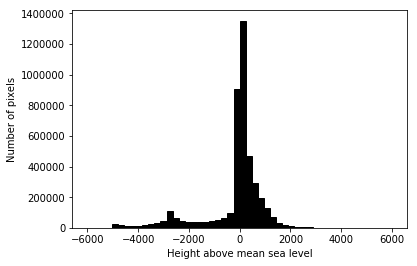

In [36]:
plt.hist(flipped_etopo.ravel(), bins=50, range=(-6000, 6000), fc='k', ec='k')
plt.xlabel('Height above mean sea level')
plt.ylabel('Number of pixels')
plt.show()


Task 6.3

Please chooose another subset of europe and display using different colormaps

Please display contours on individual maps at:

100 m

500 m

1000 m

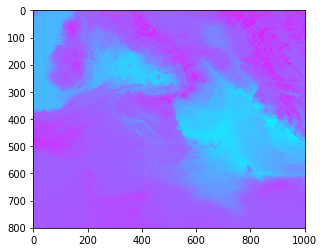

In [45]:
#subset
topoSubset=flipped_etopo[1000:2000,1000:2000]
plt.imshow(flipped_etopo[1000:2000,1000:2000],cmap='cool')
plt.show()


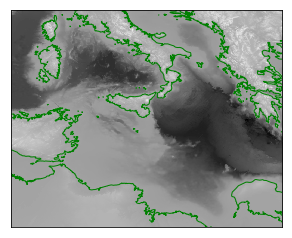

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
#find all contours at 100
contours = measure.find_contours(topoSubset, 100)
#plot them all in green
fig, ax = plt.subplots()
ax.imshow(topoSubset, interpolation='nearest', cmap=plt.cm.gray)
for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=1, color='green')

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

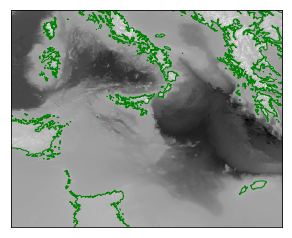

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
#find all contours at 500
contours = measure.find_contours(topoSubset, 500)
#plot them all in green
fig, ax = plt.subplots()
ax.imshow(topoSubset, interpolation='nearest', cmap=plt.cm.gray)
for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=1, color='green')

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

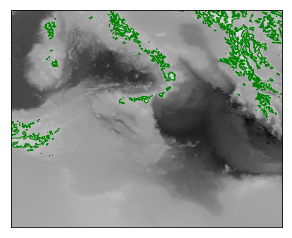

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
#find all contours at 1000
contours = measure.find_contours(topoSubset, 1000)
#plot them all in green
fig, ax = plt.subplots()
ax.imshow(topoSubset, interpolation='nearest', cmap=plt.cm.gray)
for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=1, color='green')

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [ ]:
Task 6.4

please try to use any other thin section from data_samples or the links above and experietn with the code above. Please report on challenges and difficulties, indicating what might be the cause.

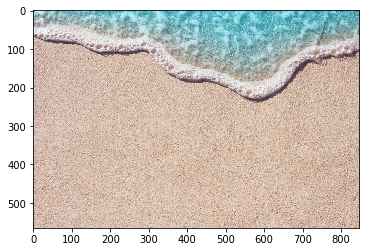

In [3]:
from PIL import Image
import requests
from io import BytesIO
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
url= "http://cdn.govexec.com/media/gbc/docs/retirement_istock_sand_2.jpg"
from io import BytesIO
response = requests.get(url)
img = np.asarray(Image.open(BytesIO(response.content)))
plt.imshow(img) 
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


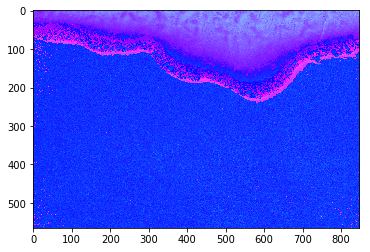

In [4]:
#convert from rgb to hsv
imgHSV=mpl.colors.rgb_to_hsv(img)
plt.imshow(imgHSV)
plt.show()

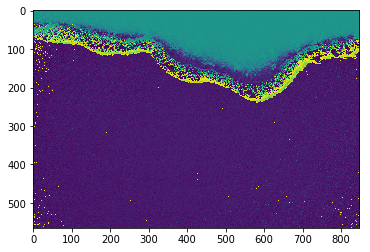

In [5]:
#extract hue
# see https://github.com/scivision/pyimagevideo/blob/master/RGB_BGR_GBR_conv.py
imgHue=imgHSV[:,:,0]
plt.imshow(imgHue)
plt.show()

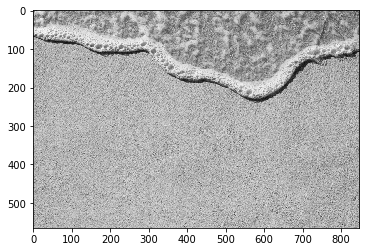

In [6]:
imgF=img.astype('float') # we will perform floating point arithmetic, so we must convert data to appropriate type
imgGray=(imgF[:,:,0]+imgF[:,:,1]+imgF[:,:,2])/3.
plt.imshow(imgGray, cmap='gray')
plt.show()


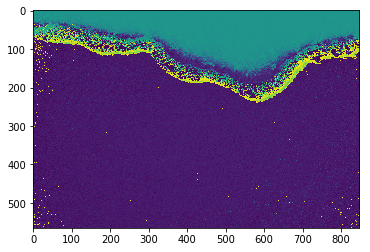

In [7]:
#we can use grayscale image as a mask
imgHueMasked=np.ma.masked_array(data = imgHue,
             mask = imgGray>250,
       fill_value = 999999)
plt.imshow(imgHueMasked)
plt.show()

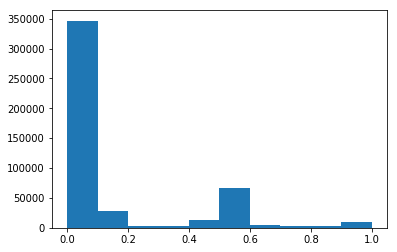

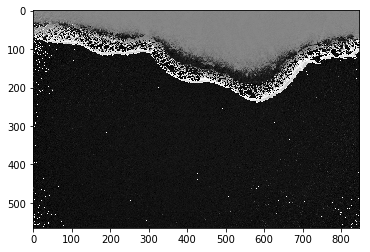

In [8]:
#Lets take a look at a histogram
mpl.pyplot.hist(imgHueMasked.flatten(), bins=10)
plt.show()
plt.imshow(imgHueMasked, cmap='gray')
plt.show()

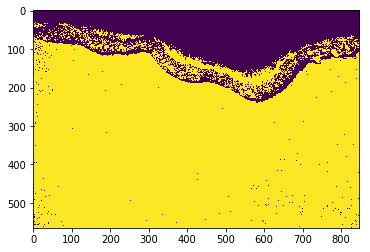

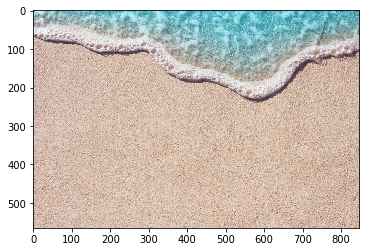

In [9]:
#we can now separate the grains from the matrix by applying a threshold:
imgThresh=imgHueMasked<0.2 # if oolite -> 1, if matrix -> 0
plt.imshow(imgThresh)
plt.show()
plt.imshow(img) 
plt.show()

In [12]:
#Now we can compute the % of matrix/cement.
print('There are %s pixels in this image' % imgThresh.count())
#inline string substitution, the result is the same as in
#print('There are ', imgThresh.count(), ' pixels in this image')
print('of which %s are oolites.' %imgThresh.sum())
percentMatrix=((1-imgThresh.sum()/imgThresh.count())*100)
print('Which means %.2f%% matrix (or cement).' %percentMatrix)

There are 479092 pixels in this image
of which 373859 are oolites.
Which means 21.97% matrix (or cement).


In [13]:
from scipy.ndimage import morphology
from skimage import morphology as mrph#, thin

import scipy

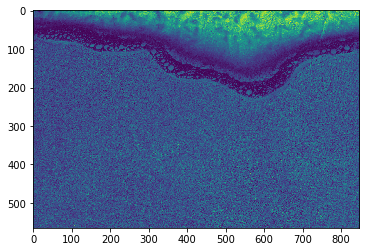

In [14]:
# We can first try to extract the grain boundary, and see if we get polyg
sat=imgHSV[:,:,1]
plt.imshow(sat)
plt.show()

In [15]:
# filtering

sobelH=np.asarray([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])
sobelV=np.asarray([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])

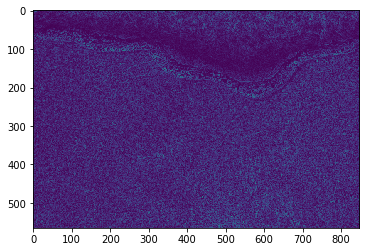

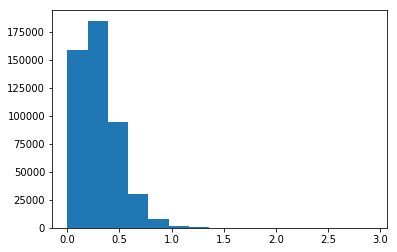

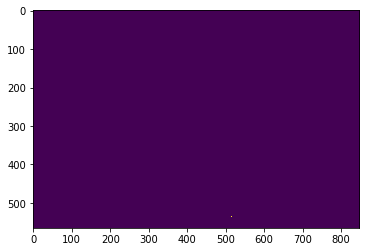

In [16]:
satConvH=scipy.ndimage.filters.convolve(sat,sobelH, mode='constant')
satConvV=scipy.ndimage.filters.convolve(sat,sobelV, mode='constant')
satEdge=np.sqrt(satConvH**2+satConvV**2)
plt.imshow(satEdge)
plt.show()
mpl.pyplot.hist(satEdge.flatten(), bins=15)
plt.show()
plt.imshow(satEdge>1.5)
plt.show()

In [17]:
# Define functions to do morphologic operations on binary arrays
imClose = lambda img, itr, rad: morphology.binary_closing(img, iterations=itr, structure=mrph.disk(radius=rad))
imOpen  = lambda img, itr, rad: morphology.binary_opening(img, iterations=itr, structure=mrph.disk(radius=rad))

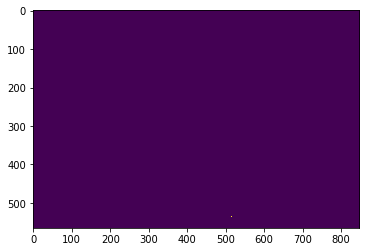

In [18]:
plt.imshow(imClose(satEdge>1.5,1,2))
plt.show()

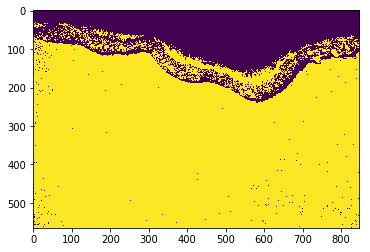

In [19]:
# Lets count the number of oolites:
plt.imshow(imgThresh)
plt.show()

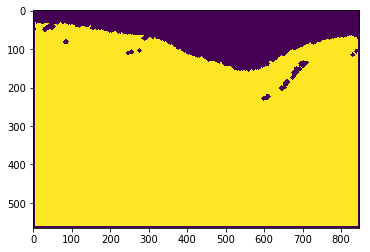

In [20]:
imgToErode=imgThresh.data*(1-imgThresh.mask)
imgThreshCosing=imClose(imgToErode,3,2)
plt.imshow(imgThreshCosing)
plt.show()

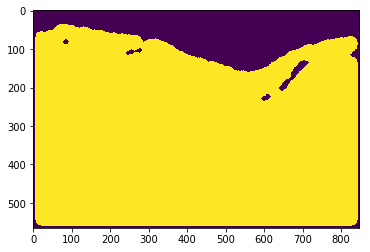

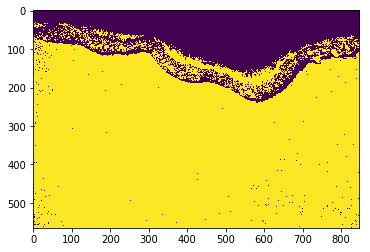

In [21]:
imgThreshCOpen=imOpen(imgThreshCosing,3,5)
plt.imshow(imgThreshCOpen)
plt.show()
plt.imshow(imgThresh) 
plt.show()

In [22]:
#from here on we can use segmentation by random walker
# https://www.scipy-lectures.org/packages/scikit-image/auto_examples/plot_segmentations.html
toSegment=imgThreshCOpen

In [23]:
import numpy as np
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from skimage import measure
from skimage.segmentation import random_walker
import matplotlib.pyplot as plt
from scipy import ndimage

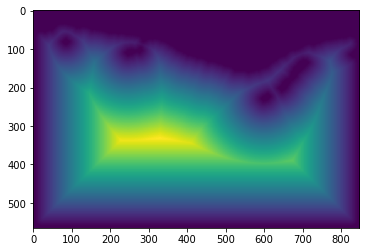

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
distance = ndimage.distance_transform_edt(toSegment)
#smooth it with convolution
distance=scipy.ndimage.filters.convolve(distance.astype('float'),np.ones((3,3)).astype('float')/9, mode='constant')
plt.imshow(distance)
plt.show()
distance

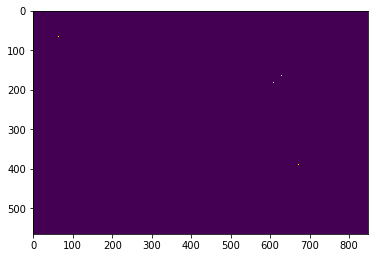

In [25]:
plt.figure(figsize=(6,6))
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)))#, labels=toSegment)
plt.imshow(local_maxi)
plt.show()

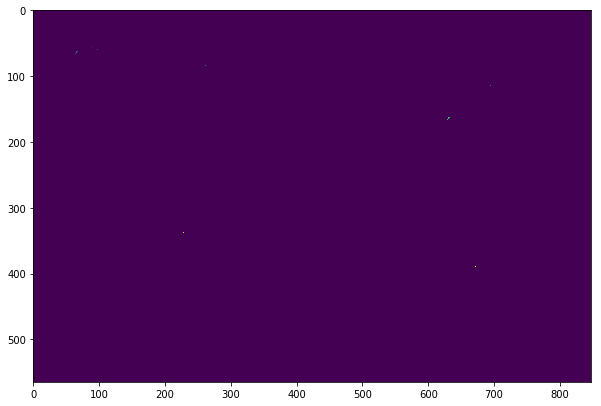

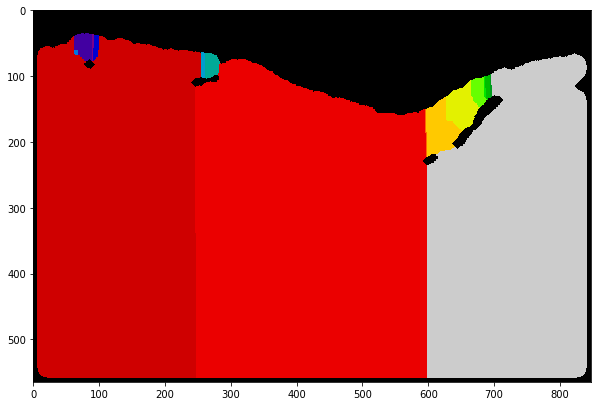

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


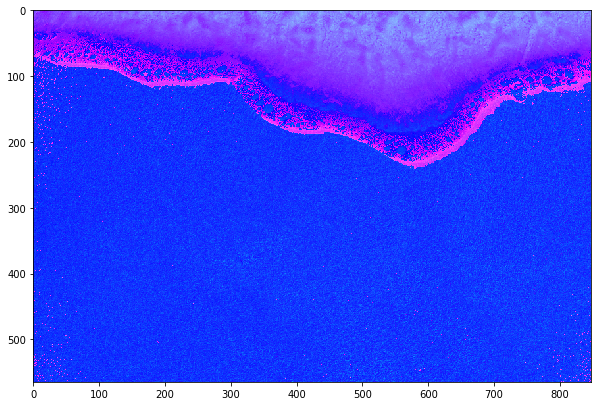

In [26]:
plt.figure(figsize=(10,10))
markers = measure.label(local_maxi)
plt.imshow(markers)
plt.show()
plt.figure(figsize=(10,10))
labels_ws = watershed(-distance, markers, mask=toSegment)
#plt.imshow(labels_ws)
plt.imshow(labels_ws, cmap='nipy_spectral', interpolation='nearest')
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(imgHSV)
plt.show()

In [27]:
#we can find all the unique values on a segmented image
np.unique(labels_ws)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

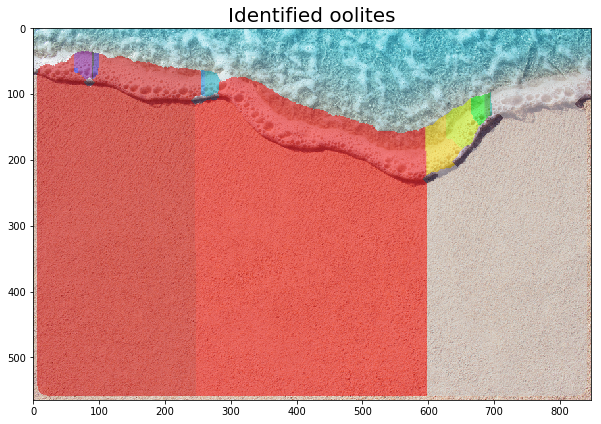

There is approximately 16 oolites on this image


In [28]:
#and count them:
plt.figure(figsize=(10,10))
plt.imshow(img) 
labels_ws_ma=np.ma.masked_array(labels_ws,1-imgThreshCOpen)
plt.imshow(labels_ws_ma, cmap='nipy_spectral', interpolation='nearest', alpha=0.5)
plt.title('Identified oolites', fontsize=20)
plt.show()
print('There is approximately %s oolites on this image' % str(len(np.unique(labels_ws))-1))


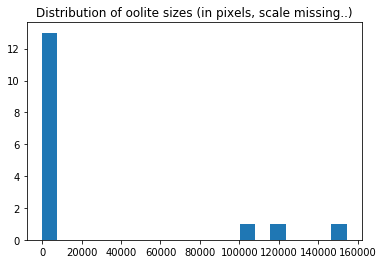

In [29]:
# We can even count their size and build a histogram to look at the distribution:
relativeSizes=[(labels_ws==i).sum() for i in np.unique(labels_ws)[1:]]
mpl.pyplot.hist(relativeSizes, bins=20)
plt.title('Distribution of oolite sizes (in pixels, scale missing..)')
plt.show()
#np.unique(labels_ws)
